# Negentropic Coupling Framework - Interactive Demo

This notebook demonstrates the **Negentropic Coupling Framework (NCF)** simulation.

## Overview

NCF models how distributed systems self-stabilize through:
- **Entropy (H)**: Information uncertainty
- **Negentropy (N)**: Order measure (N = 1 - H/Hₘₐₓ)
- **Coherence (C)**: Bidirectional alignment
- **Entropy Velocity (v)**: Rate of change

---

## 1. Setup and Imports

In [19]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt

# Import NCF simulation module
sys.path.append('../models')
from NCF_simulation import NCFSimulation, run_simulation, plot_negentropy_evolution

print("NCF Simulation Module loaded successfully!")

NCF Simulation Module loaded successfully!


## 2. Load Example Data

In [20]:
# Load example mesh configuration
with open('entropy_mesh_example.json', 'r') as f:
    example_data = json.load(f)

print("Example mesh configuration:")
print(f"  Nodes: {example_data['mesh']['nodes']}")
print(f"  Edges: {len(example_data['mesh']['edges'])}")
print(f"  Mode: {example_data['simulation_parameters']['mode']}")
print(f"  Steps: {example_data['simulation_parameters']['time_steps']}")

Example mesh configuration:
  Nodes: 5
  Edges: 10
  Mode: macro
  Steps: 10


## 3. Initialize Simulation

In [21]:
# Create simulation instance
n_nodes = example_data['mesh']['nodes']
n_edges = len(example_data['mesh']['edges'])

sim = NCFSimulation(n_nodes=n_nodes, n_edges=n_edges)

print(f"Initialized mesh with {n_nodes} nodes and {len(sim.edges)} edges")
print(f"\nSample edges: {sim.edges[:3]}")

Mesh initialized: 5 nodes, 10 edges
Initialized mesh with 5 nodes and 10 edges

Sample edges: [(2, 1), (4, 3), (3, 1)]


## 4. Compute Initial Metrics

In [22]:
# Compute metrics for first edge
edge = sim.edges[0]

entropy = sim.entropy_field(edge)
negentropy = sim.negentropic_index(edge)
coherence = sim.coherence(edge)
policy = sim.policy(edge)

print(f"Metrics for edge {edge}:")
print(f"  Shannon Entropy (H): {entropy:.4f}")
print(f"  Negentropic Index (N): {negentropy:.4f}")
print(f"  Coherence (C): {coherence:.4f}")
print(f"  Policy: {policy}")

Metrics for edge (2, 1):
  Shannon Entropy (H): 3.2358
  Negentropic Index (N): 0.0259
  Coherence (C): 0.9820
  Policy: defensive


## 5. Run Simulation

In [23]:
# Run simulation for specified steps
steps = example_data['simulation_parameters']['time_steps']
mode = example_data['simulation_parameters']['mode']

results = []
print(f"Running {steps} simulation steps...\n")

for step in range(steps):
    metrics = sim.evolve()
    results.append(metrics)
    
    if step % 2 == 0:  # Print every other step
        print(f"Step {step}: N={metrics['negentropy']:.3f}, "
              f"C={metrics['coherence']:.3f}, v={metrics['velocity']:.4f}")

print(f"\nSimulation complete!")

Running 10 simulation steps...

Step 0: N=0.043, C=0.427, v=0.0000
Step 2: N=0.020, C=0.413, v=0.0469
Step 4: N=0.014, C=0.409, v=0.0105
Step 6: N=0.015, C=0.404, v=-0.0065
Step 8: N=0.016, C=0.407, v=0.0017

Simulation complete!


## 6. Visualize Results

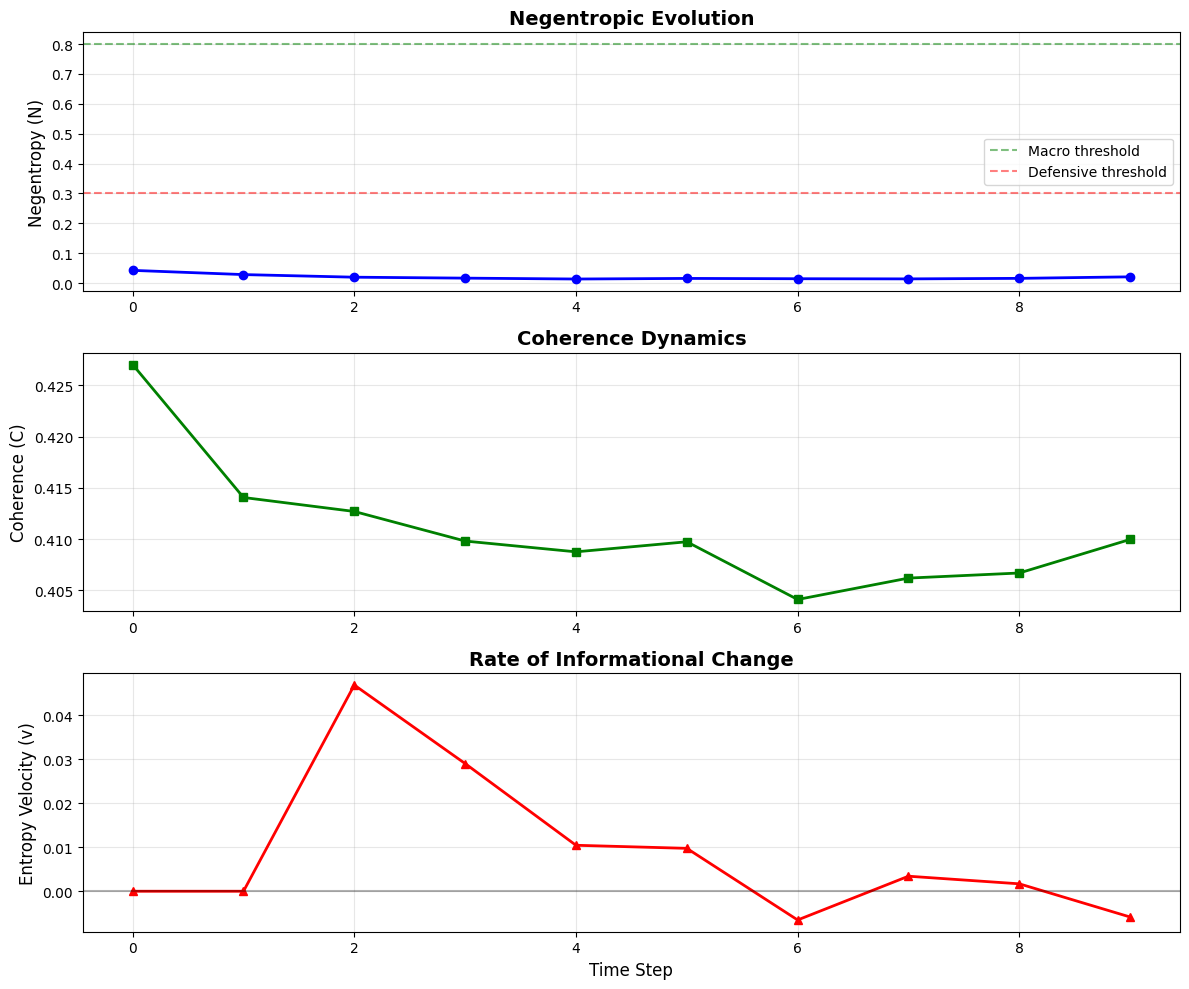


Visualization complete!


In [24]:
# Extract time series data
history = sim.get_history()
times = [h['time'] for h in history]
negentropies = [h['negentropy'] for h in history]
coherences = [h['coherence'] for h in history]
velocities = [h['velocity'] for h in history]

# Create multi-panel plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Negentropy
axes[0].plot(times, negentropies, 'b-', linewidth=2, marker='o')
axes[0].set_ylabel('Negentropy (N)', fontsize=12)
axes[0].set_title('Negentropic Evolution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.8, color='g', linestyle='--', alpha=0.5, label='Macro threshold')
axes[0].axhline(y=0.3, color='r', linestyle='--', alpha=0.5, label='Defensive threshold')
axes[0].legend()

# Plot 2: Coherence
axes[1].plot(times, coherences, 'g-', linewidth=2, marker='s')
axes[1].set_ylabel('Coherence (C)', fontsize=12)
axes[1].set_title('Coherence Dynamics', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot 3: Entropy Velocity
axes[2].plot(times, velocities, 'r-', linewidth=2, marker='^')
axes[2].set_xlabel('Time Step', fontsize=12)
axes[2].set_ylabel('Entropy Velocity (v)', fontsize=12)
axes[2].set_title('Rate of Informational Change', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete!")

## 7. Summary Statistics

In [25]:
# Compute summary statistics
final_n = negentropies[-1]
final_c = coherences[-1]
avg_n = np.mean(negentropies)
avg_c = np.mean(coherences)
max_v = max(abs(v) for v in velocities)

print("=" * 50)
print("SIMULATION SUMMARY")
print("=" * 50)
print(f"\nFinal State (t={steps-1}):")
print(f"  Negentropy: {final_n:.4f}")
print(f"  Coherence:  {final_c:.4f}")
print(f"\nAverages:")
print(f"  Mean Negentropy: {avg_n:.4f}")
print(f"  Mean Coherence:  {avg_c:.4f}")
print(f"  Max |Velocity|:  {max_v:.4f}")
print(f"\nSystem Regime:")

if final_n > 0.8 and final_c > 0.8:
    print("  → ORDERED-COHERENT (High throughput)")
elif final_n < 0.3 and final_c < 0.5:
    print("  → CHAOTIC (Defensive mode)")
else:
    print("  → TRANSITIONAL (Adaptive adjustment)")
print("\n" + "=" * 50)

SIMULATION SUMMARY

Final State (t=9):
  Negentropy: 0.0210
  Coherence:  0.4100

Averages:
  Mean Negentropy: 0.0202
  Mean Coherence:  0.4109
  Max |Velocity|:  0.0469

System Regime:
  → CHAOTIC (Defensive mode)



## 8. Explore Edge-Level Details

In [26]:
# Analyze individual edges
print("Edge-Level Policies (final state):\n")

policy_counts = {"macro": 0, "balanced": 0, "defensive": 0}

for edge in sim.edges[:5]:  # Show first 5 edges
    n = sim.negentropic_index(edge)
    c = sim.coherence(edge)
    p = sim.policy(edge)
    policy_counts[p] += 1
    
    print(f"  Edge {edge}: N={n:.3f}, C={c:.3f} → Policy: {p}")

print(f"\nPolicy Distribution (all {len(sim.edges)} edges):")
for policy, count in policy_counts.items():
    print(f"  {policy}: {count}")

Edge-Level Policies (final state):

  Edge (2, 1): N=0.015, C=0.988 → Policy: defensive
  Edge (4, 3): N=0.019, C=0.019 → Policy: defensive
  Edge (3, 1): N=0.022, C=0.022 → Policy: defensive
  Edge (3, 2): N=0.019, C=0.019 → Policy: defensive
  Edge (0, 3): N=0.009, C=0.009 → Policy: defensive

Policy Distribution (all 10 edges):
  macro: 0
  balanced: 0
  defensive: 5


In [27]:
# Canonical scenario JSON output with metadata for Electron pipeline
import json, hashlib, time, sys

# Example scenario data (replace with your real mesh/initial_state)
scenario_core = {
    "mesh": {
        "nodes": 5,
        "edges": [[0,1],[1,2],[2,3],[3,4],[4,0]]
    },
    "initial_state": {
        "probability_distributions": {
            "[0, 1]": [0.2,0.2,0.2,0.2,0.2],
            "[1, 2]": [0.1,0.3,0.3,0.2,0.1],
            "[2, 3]": [0.25,0.25,0.25,0.15,0.1],
            "[3, 4]": [0.2,0.2,0.2,0.2,0.2],
            "[4, 0]": [0.2,0.2,0.2,0.2,0.2]
        }
    }
}

def scenario_metadata(scenario, source_path):
    raw = json.dumps(scenario, sort_keys=True).encode()
    return {
        "checksum": hashlib.sha256(raw).hexdigest(),
        "size": len(raw),
        "timestamp": time.time(),
        "source": source_path
    }

scenario = dict(scenario_core)
scenario["metadata"] = scenario_metadata(scenario_core, "models/NCF_simulation.py")

print(json.dumps(scenario, indent=2))

{
  "mesh": {
    "nodes": 5,
    "edges": [
      [
        0,
        1
      ],
      [
        1,
        2
      ],
      [
        2,
        3
      ],
      [
        3,
        4
      ],
      [
        4,
        0
      ]
    ]
  },
  "initial_state": {
    "probability_distributions": {
      "[0, 1]": [
        0.2,
        0.2,
        0.2,
        0.2,
        0.2
      ],
      "[1, 2]": [
        0.1,
        0.3,
        0.3,
        0.2,
        0.1
      ],
      "[2, 3]": [
        0.25,
        0.25,
        0.25,
        0.15,
        0.1
      ],
      "[3, 4]": [
        0.2,
        0.2,
        0.2,
        0.2,
        0.2
      ],
      "[4, 0]": [
        0.2,
        0.2,
        0.2,
        0.2,
        0.2
      ]
    }
  },
  "metadata": {
    "checksum": "0d6ea6cdf318629733602ba70441f7181dafbd6957ad4840fb3ed8bcdf38da3a",
    "size": 312,
    "timestamp": 1764989555.615531,
    "source": "models/NCF_simulation.py"
  }
}


## 9. Theoretical Interpretation

### Key Insights:

1. **Negentropy (N)** measures order:
   - N → 1: Highly ordered, predictable
   - N → 0: Maximum entropy, chaotic

2. **Coherence (C)** measures alignment:
   - High C: Bidirectional agreement
   - Low C: Asymmetric information flow

3. **Entropy Velocity (v)** tracks change:
   - v > 0: Increasing uncertainty
   - v < 0: Decreasing uncertainty (ordering)

4. **Policy Mapping**:
   - `macro`: High-throughput, zero-copy frames (N > 0.8)
   - `balanced`: Moderate throughput (0.3 ≤ N ≤ 0.8)
   - `defensive`: Conservative, ACK-based (N < 0.3)

### Mathematical Foundation:

The system evolves according to:

```
x(t+1) = F(x(t)) + G(N(t), C(t), V(t)) x(t)
```

where **G** is the adaptive coupling operator that adjusts inter-node influence based on measured information fields.

---

**Citation:**
> gsknnft (2025). The Negentropic Coupling Framework (NCF) v1.0.  
> SigilNet Research Series.  
> https://github.com/gsknnft/NegatropicCouplingTheory